In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Пример ручнога обсчета

Рассмотрим небольшой пример, позволяющий проследить весь ход вычислений. Пусть класс <<$-1$>> (синий) содержит точки $x_1=(0,0)$, $x_2=(1,0)$, а класс <<$+1$>> (красный) содержит точки $x_3 = (2, 0)$ и $x_4 = (0, 2)$. Для удобства представим данные следующей таблицей:
$$
\begin{array}{|c|c|c|c|}
	\hline \text{Объект} & X_1 & X_2 & \text{Отклик} \\
	\hline x_1 & 0 & 0 & -1 \\
	\hline x_2 & 1 & 0 & -1 \\
	\hline x_3 & 2 & 0 & +1 \\
	\hline x_4 & 0 & 2 & +1 \\
	\hline
\end{array}
$$

Наверное, нетрудно понять, что опорными векторами, скорее всего, будут $x_2, x_3, x_4$, но давайте это проверим!

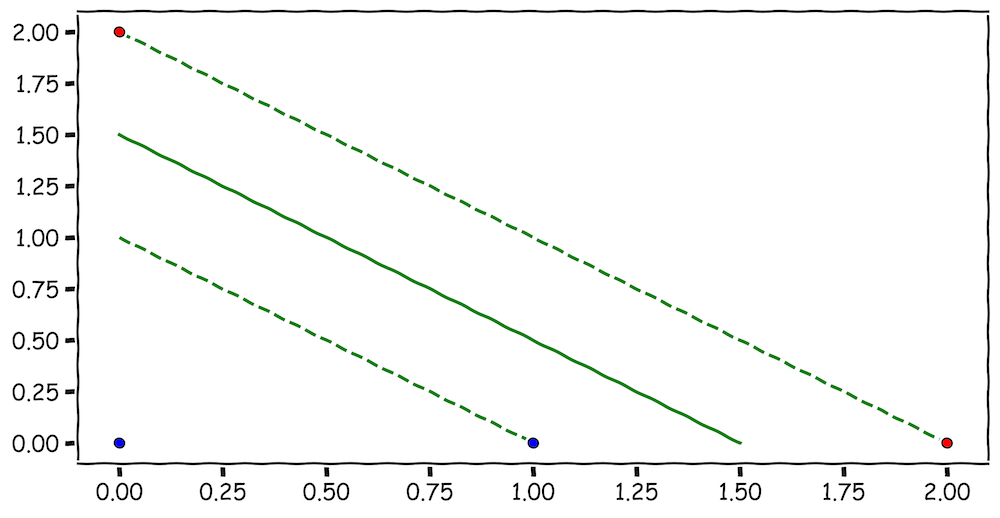

Итак, во веденных обозначениях,

$$
x_1 = (0, 0), \ x_{11} = 0, \ x_{12} = 0,
$$

$$
x_2 = (1, 0), \ x_{21} = 1, \ x_{22} = 0,
$$

$$
x_3 = (2, 0), \ x_{31} = 2, \ x_{32} = 0,
$$

$$
x_4 = (0, 2), \ x_{41} = 0, \ x_{42} = 2
$$

и скалярное произведение элемента $x_i$ на элемент $x_j$ вычисляется, как
$$
(x_i, x_j) = x_{i1}x_{j1} + x_{i2}x_{j2}, \ i, j \in \{1, 2, 3, 4\}.
$$

Так как имеется четыре тренировочных объекта, то есть $n = 4$, причем

$$
(x_1, x_1) = (x_1, x_2) = (x_1, x_3) = (x_1, x_4) = 0,
$$

$$
(x_2, x_2) = 1,\  (x_2, x_3) = 2, \ (x_2, x_4) = 0,
$$

$$
(x_3, x_3) = 4, \ (x_3, x_4) = 0,
$$

$$
(x_4, x_4) = 4,
$$

то в нашем случае минимизируемое выражение

$$
-L(\lambda) = -\sum\limits_{i = 1}^n \lambda_i + \frac{1}{2}\sum\limits_{i = 1}^n\sum\limits_{j = 1}^n \lambda_i\lambda_jy_iy_j(x_i, x_j)
$$

примет следующий вид:

$$
-L(\lambda) = -\lambda_1-\lambda_2-\lambda_3-\lambda_4 + \frac{1}{2}\left(\lambda_2^2 + 4\lambda_3^2 + 4\lambda_4^2 - 4\lambda_2\lambda_3 \right)
$$

и, кроме условий $\lambda_i \geq 0$, $i \in  \{1, 2, 3, 4\}$, в силу последнего условия оптимизационной задачи

$$
\sum\limits_{i = 1}^n \lambda_i y_i = 0,
$$

возникает еще одно условие

$$
\lambda_1 + \lambda_2 - \lambda_3 - \lambda_4 = 0.
$$

Итого, мы приходим к следующей задаче:

$$
\begin{cases}
-L(\lambda) = -\lambda_1-\lambda_2-\lambda_3-\lambda_4 + \frac{1}{2}\left(\lambda_2^2 + 4\lambda_3^2 + 4\lambda_4^2 - 4\lambda_2\lambda_3 \right) \xrightarrow[]{} \min\limits_\lambda \\
\lambda_i \geq 0, \quad i \in \{1, 2, 3, 4 \} \\
\lambda_1 + \lambda_2 - \lambda_3 - \lambda_4 = 0
\end{cases}.
$$

Полученная задача -- это стандартная задача дифференциального исчисления функций многих переменных: поиск наименьшего значения заданной функции в заданной области при некоторых ограничениях (условиях). У непрерывной функции это значение может достигаться либо во внутренней точке области, либо на ее границе.

Необходимым условием локального экстремума во внутренней точке области является равенство нулю частных производных, откуда приходим к следующей системе:

$$
\begin{cases}
	-\frac{\partial L(\lambda)}{\partial \lambda_1} = 0 \\
	-\frac{\partial L(\lambda)}{\partial \lambda_2} = 0 \\
	-\frac{\partial L(\lambda)}{\partial \lambda_3} = 0 \\
	-\frac{\partial L(\lambda)}{\partial \lambda_4} = 0
\end{cases} \Leftrightarrow
\begin{cases}
-1 = 0 \\
-1 + \lambda_2 - 2\lambda_3 = 0 \\
-1 + 4\lambda_3 - 2\lambda_2 = 0 \\
-1 + 4 \lambda_4 = 0.
\end{cases}
$$

Ясно, что уже первое уравнение системы не имеет ни одного решения, а значит и вся система решений не имеет. Тем самым, наименьшее значение функции стоит искать на границе области.

Пусть $\lambda_1 = 0$, тогда третье уравнение перепишется в виде $\lambda_2 = \lambda_3 + \lambda_4$ и функция, которую мы исследуем на наименьшее значение, перепишется в виде

$$
-L(\lambda_3, \lambda_4) = -2\lambda_3 - 2\lambda_4 + \frac{1}{2}\left((\lambda_3 + \lambda_4)^2 + 4\lambda_3^2 + 4 \lambda_4^2 - 4(\lambda_3 + \lambda_4)\lambda_3 \right),
$$

а область, в которой ищется наименьшее значение, будет задаваться соотношениями $\lambda_3, \lambda_4 \geq 0$.

Вычислив частные производные по $\lambda_3$ и $\lambda_4$, получим систему

$$
\begin{cases}
	-2+\lambda_3+\lambda_4+4\lambda_3-4\lambda_3-2\lambda_4=0 \\
	-2+\lambda_3 + \lambda_4 + 4\lambda_4 - 2\lambda_3 = 0
\end{cases}
\Leftrightarrow
\begin{cases}
	\lambda_3 - \lambda_4 = 2 \\
	-\lambda_3+5\lambda_4 = 2
\end{cases},
$$

откуда $\lambda_3 = 3$, $\lambda_4 = 1$, $\lambda_2 = 4$ и $\lambda_1 = 0$, а $-L(3,1) = -4$. Можно показать, что это и будет наименьшее значение рассматриваемой функции в заданной области.

Проверяя аналогичным образом остальные границы получим, что на них у рассматриваемой функции наименьшее значение больше, чем $-4$, а значит, как мы и предполагали ранее, элементы $x_2, x_3, x_4$ являются опорными векторами, ведь именно отвечающие им коэффициенты $\lambda$ отличны от нуля.

Для того чтобы построить оптимальную разделяющую гиперплоскость, найдем для начала  вектор нормали $w$:

$$
w = \sum\limits_{i = 1}^4 \lambda_i y_i x_i = 0 \cdot (-1) \cdot x_1 + 4 \cdot (-1) \cdot x_2 + 3 \cdot 1 \cdot x_3 + 1 \cdot 1 \cdot x_4 =
$$

$$
= -(0,0) - 4(1, 0) + 3(2, 0) + (0,2) = (0,0) - (4,0) + (6,0) + (0,2) = (2,2).
$$

Осталось вычислить $w_0$. Для этого возьмем какой-нибудь опорный вектор, например $x_2 = (1,0)$, и вычислим

$$
w_0 = (w, x_2) - y_2 = 2 - (-1) = 3.
$$

Итого, оптимальная разделяющая гиперплоскость определяется уравнением

$$
2X_1 + 2X_2 - 3 = 0,
$$

а классификатор задается выражением

$$
f(X) = f(X_1, X_2) = 2X_1 + 2X_2 - 3.
$$

# Отступление про `scipy.optimize.minimize`


`scipy.minimize` позволяет находить минимум целевой функции. Она поддерживает различные методы оптимизации и позволяет задавать ограничения (`constraints`) и границы (`bounds`) для переменных.



1.   `constraints` позволяют задать условия, которые должны выполняться в процессе оптимизации. Бывают двух типов:


*   `{'type': 'eq', 'fun': function}` — ограничение на равенство (eq). Функция `function` должна возвращать 0, если ограничение выполнено.
*   `{'type': 'ineq', 'fun': function}` — ограничение на неравенство (ineq). Функция `function` должна возвращать положительное значение, если ограничение выполнено, и отрицательное, если не выполнено.

**Замечание:**  случае необходимости в словарь можно добавить ключ `'args':`, описывающий дополнительные аргументы, передаваемые в функцию.

2.   `bounds` задают диапазон допустимых значений для каждой переменной. Они задаются в виде списка кортежей, где каждый кортеж содержит нижнюю и верхнюю границы для соответствующей переменной. Например, `[(0, None), (None, 1)]` означает, что первая переменная должна быть не меньше 0, а вторая переменная должна быть не больше 1.

### Пример

Пусть необходимо найти минимум функции

$$
f(x,y) = x^2 + y^2
$$

При следующих ограничениях:

$$
x+y=1, \quad x-y > 0
$$

Оптимальные значения: x = 0.5000000000000018, y = 0.5


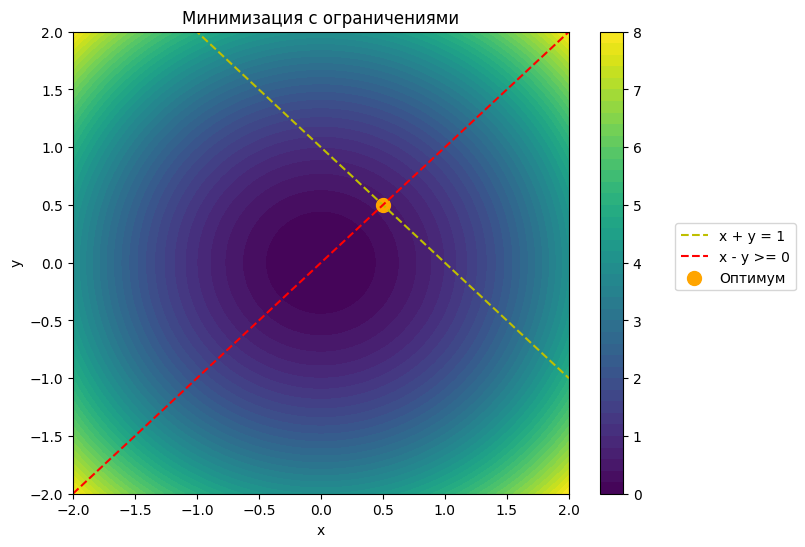

In [ ]:
# Целевая функция
def objective(x):
    return x[0]**2 + x[1]**2

# Ограничение на равенство
def constraint1(x):
    return x[0] + x[1] - 1

# Ограничение на неравенство
def constraint2(x):
    return x[0] - x[1]

# Начальное предположение
x0 = [5, 5]

# Границы для переменных
bounds = [(0, None), (0, None)]

# Ограничения
constraints = ({'type': 'eq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2})

# Минимизация
solution = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Результат
x_opt = solution.x
print(f"Оптимальные значения: x = {x_opt[0]}, y = {x_opt[1]}")

# Визуализация
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = objective([X, Y])
plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.plot(x, 1 - x, 'y--', label='x + y = 1')
plt.plot(x, x, 'r--', label='x - y >= 0')
plt.scatter(x_opt[0], x_opt[1], label='Оптимум', color='orange', s=100)
#plt.legend()
plt.legend(bbox_to_anchor=(1.2, 0.6), loc="upper left")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2,2)
plt.title('Минимизация с ограничениями')
plt.show()

# Генерация данных

Сгенерирум данные

In [ ]:
random_seed = 12
n_samples = 40

np.random.seed(random_seed)
X_pos = np.random.randn(n_samples // 2, 2) + [2, 2]  # Положительный класс
X_neg = np.random.randn(n_samples // 2, 2) - [2, 2]  # Отрицательный класс
X = np.vstack((X_pos, X_neg))  # Объединение данных
y = np.hstack((np.ones(n_samples // 2), -np.ones(n_samples // 2)))  # Метки классов

Визуализируем результат

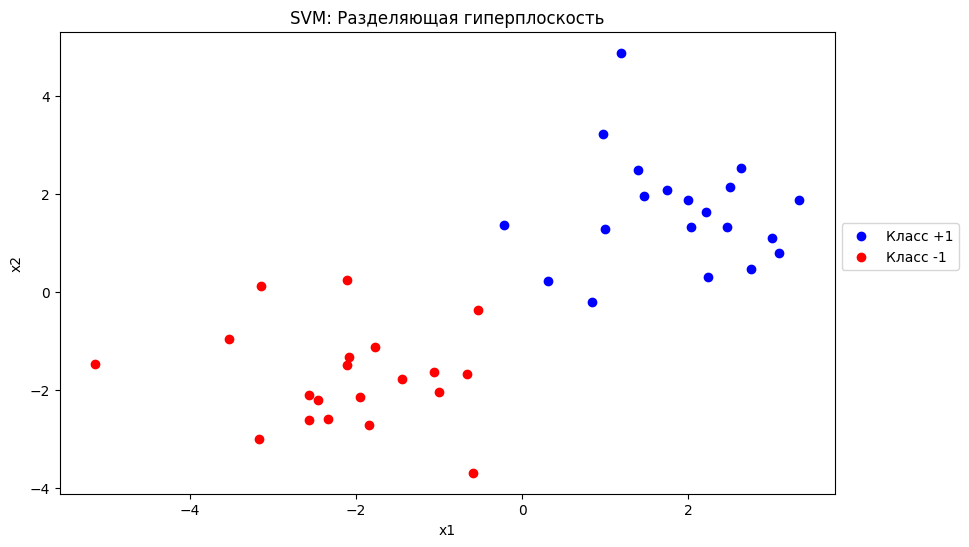

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Класс +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Класс -1')

plt.legend()
plt.title('SVM: Разделяющая гиперплоскость')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(bbox_to_anchor=(1, 0.6), loc="upper left")
plt.show()

# Линейная разделимость

## Исходная задача

Напомним, что в случае предположения о линейной разделимости данных оптимизационная задача выглядит следующим образом

$$
\begin{cases}
\underset{w,w_0}{\operatorname{argmin}}\frac{1}{2}||w||^2 \\
y_i(w^Tx_i + w_0) - 1 \geq 0, \quad i \in \{1, 2, ..., n\}
\end{cases},
$$

где $w$ — вектор весов, $w_0$ — смещение, $y_i \in \{-1,1\}$ — отклик, $x_i$ — объект данных.

Для начала инициализирум параметры

In [ ]:
np.random.seed(random_seed)

params = np.random.uniform(size = (X.shape[1] + 1))
params

array([0.15416284, 0.7400497 , 0.26331502])

Реализуйте механизм вычисления целевой функции

In [ ]:
def get_target_function(params, X, y):
    """
    Целевая функция для минимизации

    Параметры:
    - params (np.ndarray): Вектор параметров [w0, w1, w2, ..., wp].
    - X (np.ndarray): Матрица признаков размерностью (n_samples, n_features).
    - y (np.ndarray): Вектор меток размерностью (n_samples,).

    Возвращает:
    - float: Значение целевой функции.
    """
    w = params[1:]
    return 0.5 * np.dot(w, w)

assert np.isclose(get_target_function(params, X, y), 0.30850417526724516)

Реализуйте функцию для описания ограничений

In [ ]:
def get_constraints(params, X, y):
    """
    Параметры:
    - params (np.ndarray): Вектор параметров [w0, w1, w2, ..., wp].
    - X (np.ndarray): Матрица признаков размерностью (n_samples, n_features).
    - y (np.ndarray): Вектор меток размерностью (n_samples,).

    Возвращает:
    - np.ndarray: Массив значений ограничений для каждого объекта.
    """
    w0 = params[0]
    w = params[1:]
    linear_combination = X @ w + w0
    constraints = y * linear_combination - 1
    return constraints

assert np.isclose(
    get_constraints(params, X, y)[:20],
    np.array([ 1.33149562,  0.89248031,  1.31414022,  1.13302881,  1.31987874, 0.84287862,
              1.65198207,  2.12213882,  1.66956857,  0.71754632, 1.568863  ,  1.77394194,
               -0.27619561, -0.55452319, -0.65141209, 0.75952244,  1.21877771,  0.992279  ,
               0.23494279,  1.00858893])
    ).all()

При помощи `scipy.optimize.minimize` произведите минимизацию целевой функции с использованием описанных ограничений.

In [ ]:
def train_svm(params, X, y):
    """
    Обучает линейный SVM с использованием scipy.optimize.minimize.

    Параметры:
    - X (np.ndarray): Матрица признаков размерностью (n_samples, n_features).
    - y (np.ndarray): Вектор меток размерностью (n_samples,).

    Возвращает:
    - dict: Результаты оптимизации, содержащие вектор весов и смещение.
    """
    # Определяем ограничения в формате scipy
    constraints = {
        'type': 'ineq',
        'fun': lambda params: get_constraints(params, X, y)
    }

    # Минимизируем целевую функцию
    result = minimize(
        fun=lambda params: get_target_function(params, X, y),
        x0=params,
        method='SLSQP',
        constraints=constraints
    )

    return result

final_params = train_svm(params, X, y).x
assert np.isclose(final_params, np.array([0.25326976, 1.61576598, 1.09729555])).all()

Определите индексы опорных векторов

In [ ]:
def get_support_vectors(final_params, X, y):
    """
    Возвращает индексы опорных векторов из набора данных X

    Параметры:
    - final_params (np.ndarray): Вектор параметров [w0, w1, w2, ..., wp] после решения оптимизационной задачи.
    - X (np.ndarray): Матрица признаков размерностью (n_samples, n_features).
    - y (np.ndarray): Вектор меток размерностью (n_samples,).

    Возвращает:
    - support_vectors (np.ndarray): Вектор индексов опорных векторов
    """
    w0 = final_params[0]
    w = final_params[1:]
    linear_combination = X @ w + w0
    values = y * linear_combination

    # Находим индексы объектов, для которых значение близко к 1
    # Используем небольшой порог для учета численных погрешностей
    support_vector_indices = np.where(np.isclose(values, 1.0, atol=1e-6))[0]

    return support_vector_indices

support_vectors = get_support_vectors(final_params, X, y)
assert np.isclose(support_vectors, np.array([ 13, 37])).all()

Визуализируем результат

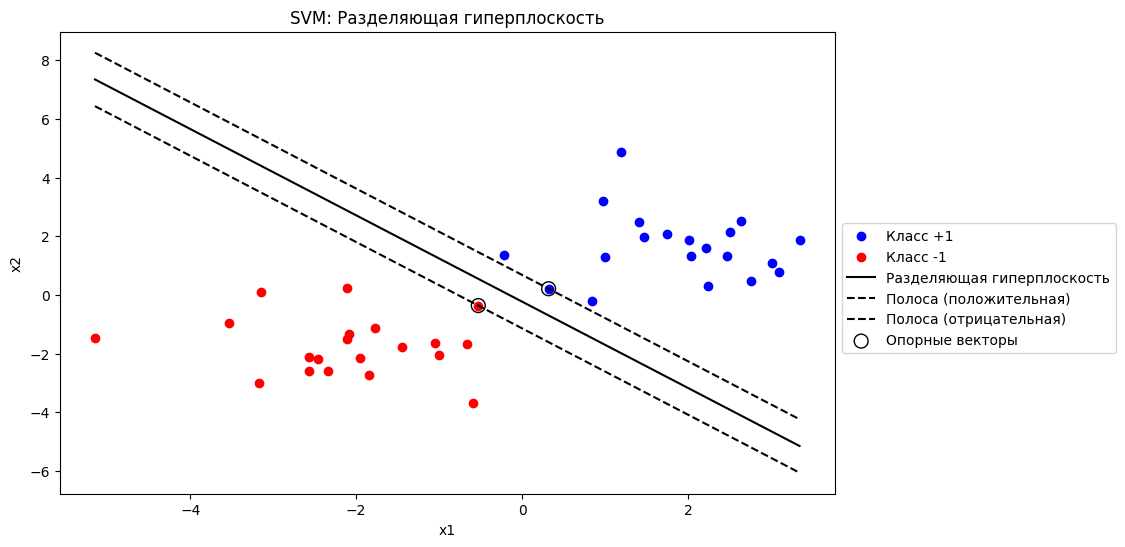

In [ ]:
plt.figure(figsize=(10,6))

w = final_params[1:]
w0 = final_params[0]

# Построение данных
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Класс +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Класс -1')

# Разделяющая гиперплоскость
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = -(w[0] * x1 + w0) / w[1]
plt.plot(x1, x2, 'k-', label='Разделяющая гиперплоскость')

# Полосы
margin_pos = -(w[0] * x1 + w0 - 1) / w[1]
margin_neg = -(w[0] * x1 + w0 + 1) / w[1]
plt.plot(x1, margin_pos, 'k--', label='Полоса (положительная)')
plt.plot(x1, margin_neg, 'k--', label='Полоса (отрицательная)')

# Выделение опорных векторов
plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=100, facecolors='none', edgecolors='k', label='Опорные векторы')
plt.title('SVM: Разделяющая гиперплоскость')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(bbox_to_anchor=(1, 0.6), loc="upper left")
plt.show()

In [ ]:
model = SVC(kernel='linear', C=1)
model.fit(X, y)
model.support_

array([37, 13], dtype=int32)

## Эквивалентная задача

В качестве эквивалентной задачи рассматривается следующая:

$$
\begin{cases}
-L(\lambda) = -\sum\limits_{i = 1}^n \lambda_i + \frac{1}{2}\sum\limits_{i = 1}^n\sum\limits_{j = 1}^n \lambda_i\lambda_jy_iy_j(x_i, x_j) \xrightarrow[]{} \min\limits_\lambda \\
\lambda_i \geq 0, \quad i \in \{1, 2, ..., n \} \\
\sum\limits_{i = 1}^n \lambda_i y_i = 0
\end{cases},
$$

где $\lambda_i$ — аргументы функции Лагранжа (по сути искомые гиперпараметры).

Тогда, решив полученную задачу, для построения разделяющей гиперплоскости можно действовать по следующему алгоритму:


*   Определить $w$ из соотношения

$$
w = \sum\limits_{i = 1}^n \lambda_i y_i x_i.
$$

*   Найти $w_0$. Для этого достаточно взять произвольный опорный вектор $x$ и из соотношения $(w, x_i) - w_0 = y_i$ найти

$$
w_0 = (w, x_i) - y_i.
$$

Инициализируем параметры.

In [ ]:
np.random.seed(random_seed)

params = np.random.uniform(size = (X.shape[0]))
params.shape

(40,)

In [ ]:
def get_target_function(params, X, y):
    """
    Целевая функция для минимизации

    Параметры:
    - params (np.ndarray): Вектор параметров [lmbd_0, lmbd_1, lmbd_2, ..., lmbd_n].
    - X (np.ndarray): Матрица признаков размерностью (n_samples, n_features).
    - y (np.ndarray): Вектор меток размерностью (n_samples,).

    Возвращает:
    - float: Значение целевой функции.
    """

    term1 = -np.sum(params)

    Y = np.outer(y, y)
    K = X @ X.T
    Lambda = np.outer(params, params)

    term2 = 0.5 * np.sum(Lambda * Y * K)

    return term1 + term2

assert np.isclose(get_target_function(params, X, y), 1279.1934221910778)

In [ ]:
def get_constraints(params, y):
    """
    Параметры:
    - params (np.ndarray): Вектор параметров [lmbd_0, lmbd_1, lmbd_2, ..., lmbd_n].
    - y (np.ndarray): Вектор меток размерностью (n_samples,).

    Возвращает:
    - (float): Значение скалярного произведения lambda и y.
    """
    return np.dot(params, y)

assert np.isclose(get_constraints(params, y), -0.8670339175868664)

In [ ]:
def train_svm(params, X, y):
    """
    Обучает линейный SVM с использованием scipy.optimize.minimize.

    Параметры:
    - params (np.ndarray): Вектор параметров [lmbd_0, lmbd_1, lmbd_2, ..., lmbd_n].
    - X (np.ndarray): Матрица признаков размерностью (n_samples, n_features).
    - y (np.ndarray): Вектор меток размерностью (n_samples,).

    Возвращает:
    - dict: Результаты оптимизации (результат функции minimize)
    """
    # Определяем ограничения
    bounds = [(0, None) for _ in range(len(params))]

    constraint = {
        'type': 'eq',
        'fun': lambda lmbd: np.dot(lmbd, y),
        'jac': lambda lmbd: y  # градиент ограничения
    }

    # Минимизируем целевую функцию
    result = minimize(
        fun=get_target_function,
        x0=params,
        args=(X, y),
        method='SLSQP',
        bounds=bounds,
        constraints=constraint,
        options={'disp': False}
    )

    return result

final_params = train_svm(params, X, y).x
assert np.isclose(final_params[[13,37]], np.array([1.90737851, 1.90737851])).all()
assert np.isclose(np.delete(final_params, np.array([13,37])), 0).all()

Найдите параметры гиперплоскости

In [ ]:
def get_hyperplane(final_params, X, y):
    """
    Находит коэффициенты гиперплоскости

    Параметры:
    - final_params (np.ndarray): Вектор параметров [lmbd_0, lmbd_1, lmbd_2, ..., lmbd_n]
                                 после решения оптимизационной задачи.
    - X (np.ndarray): Матрица признаков размерностью (n_samples, n_features).
    - y (np.ndarray): Вектор меток размерностью (n_samples,).

    Возвращает:
    - (support_vectors, w0, w): индексы опорных векторов,
                                коэффициент смещения,
                                координаты нормального вектора гиперплоскости.
    """
    support_vectors = np.where(final_params > 1e-8)[0]
    w = np.sum(final_params[:, np.newaxis] * y[:, np.newaxis] * X, axis=0)
    i = support_vectors[0]
    w0 = y[i] - np.dot(w, X[i])
    return support_vectors, w0, w

support_vectors, w0, w = get_hyperplane(final_params, X, y)
assert np.isclose(support_vectors, np.array([13, 37])).all()
assert np.isclose(w0, 0.2532710338901547)
assert np.isclose(w, np.array([1.61556771, 1.09758731])).all()

Визуализация

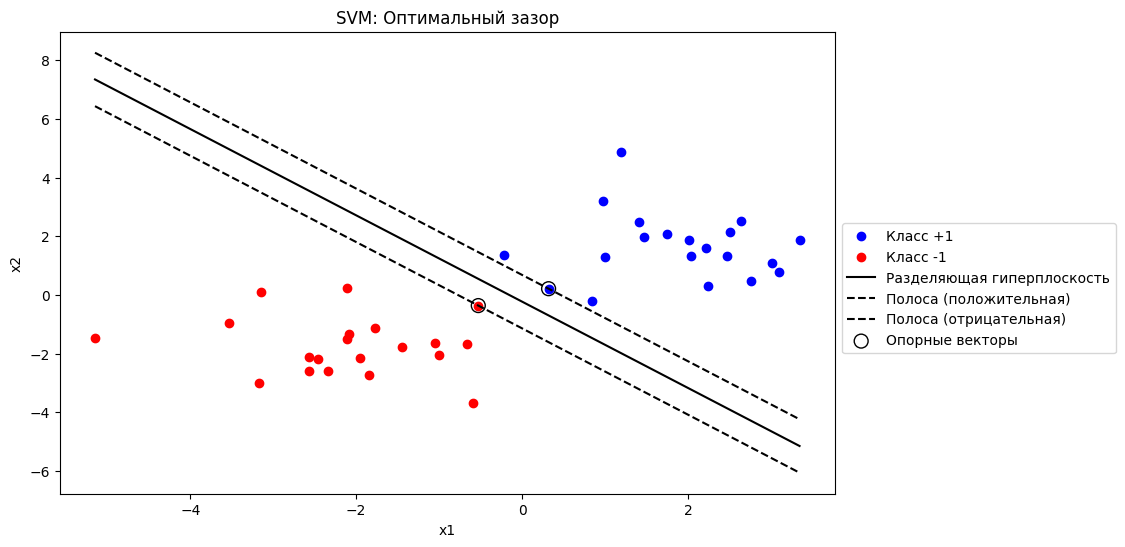

In [ ]:
plt.figure(figsize=(10,6))

# Построение данных
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Класс +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Класс -1')

# Разделяющая гиперплоскость
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = -(w[0] * x1 + w0) / w[1]
plt.plot(x1, x2, 'k-', label='Разделяющая гиперплоскость')

# Полосы: x2 = -(w1 * x1 + w0 - 1) / w2 и x2 = -(w1 * x1 + w0 + 1) / w2
margin_pos = -(w[0] * x1 + w0 - 1) / w[1]
margin_neg = -(w[0] * x1 + w0 + 1) / w[1]
plt.plot(x1, margin_pos, 'k--', label='Полоса (положительная)')
plt.plot(x1, margin_neg, 'k--', label='Полоса (отрицательная)')

# Выделение опорных векторов
plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=100, facecolors='none', edgecolors='k', label='Опорные векторы')
plt.title('SVM: Оптимальный зазор')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(bbox_to_anchor=(1, 0.6), loc="upper left")
plt.show()

# Мягкий зазор

В случае использования мягкого зазора та самая "мягкость" регулируется параметром регуляризации $C$, который контролирует баланс между максимизацией зазора и минимизацией ошибок.

В таком случае оптимизационная задача выглядит следующим образом:

$$
\begin{cases}
-L(\lambda) = -\sum\limits_{i = 1}^n \lambda_i + \frac{1}{2}\sum\limits_{i = 1}^n\sum\limits_{j = 1}^n \lambda_i\lambda_jy_iy_j(x_i, x_j) \xrightarrow[]{} \min\limits_\lambda \\
\sum\limits_{i = 1}^n \lambda_i y_i = 0 \\
0 \leq \lambda_i \leq C, \quad i \in \{1, 2, ..., n\}
\end{cases},
$$

Инициализируем параметры

In [ ]:
np.random.seed(random_seed)

C = 1/3
params = np.random.uniform(size = (X.shape[0]))
params.shape

(40,)

Изменениям подлежат только несколько функций, остальные будут такими же.

In [ ]:
def train_svm_soft_margin(params, X, y, C=1):
    """
    Обучает линейный SVM с использованием scipy.optimize.minimize.

    Параметры:
    - params (np.ndarray): Вектор параметров [lmbd_0, lmbd_1, lmbd_2, ..., lmbd_n].
    - X (np.ndarray): Матрица признаков размерностью (n_samples, n_features).
    - y (np.ndarray): Вектор меток размерностью (n_samples,).
    - C (float): Значение параметра регуляризации

    Возвращает:
    - dict: Результаты оптимизации (результат функции minimize)
    """
    # Определение ограничений lambda_i >= 0
    # Определение ограничений 0 <= lambda_i <= C
    bounds = [(0, C) for _ in range(len(params))]

    # Ограничение равенства: sum(lambda_i * y_i) = 0
    constraint = {
        'type': 'eq',
        'fun': lambda lmbd: np.dot(lmbd, y),
        'jac': lambda lmbd: y
    }

    # Минимизация целевой функции
    result = minimize(
        fun=get_target_function,
        x0=params,
        args=(X, y),
        method='SLSQP',
        bounds=bounds,
        constraints=constraint,
        options={'disp': False}
    )

    return result

final_params = train_svm_soft_margin(params, X, y, C).x
assert np.isclose(
    final_params,
    np.array([0.00000000e+00,0.00000000e+00,0.00000000e+00,2.34177547e-15, 0.00000000e+00,0.00000000e+00,0.00000000e+00,
              0.00000000e+00, 0.00000000e+00,1.88839983e-15,0.00000000e+00,7.54892018e-18, 2.95258410e-01,3.33333333e-01,
              0.00000000e+00,7.21475694e-16, 0.00000000e+00,1.25445460e-15,1.13698039e-15,2.00335951e-15, 0.00000000e+00,
              2.70365371e-01,1.84642152e-16,2.48930389e-02, 0.00000000e+00,3.68447840e-16,3.50541711e-16,8.71227788e-16,
              2.01808636e-16,7.51833415e-16,1.67715495e-15,0.00000000e+00, 0.00000000e+00,0.00000000e+00,5.19402482e-18,
              0.00000000e+00, 0.00000000e+00,3.33333333e-01,9.26757697e-16,2.95654108e-16])
    ).all()

In [ ]:
def get_hyperplane_soft_margin(final_params, X, y, C):
    """
    Находит коэффициенты гиперплоскости

    Параметры:
    - final_params (np.ndarray): Вектор параметров [lmbd_0, lmbd_1, lmbd_2, ..., lmbd_n]
                                 после решения оптимизационной задачи.
    - X (np.ndarray): Матрица признаков размерностью (n_samples, n_features).
    - y (np.ndarray): Вектор меток размерностью (n_samples,).
    - C (float): Значение параметра регуляризации

    Возвращает:
    - (support_vectors, imposters, w0, w): индексы опорных векторов,
                                индексы нарушителей
                                коэффициент смещения,
                                координаты нормального вектора гиперплоскости.
    """
    # Находим опорные векторы
    support_vectors = np.where((final_params > 1e-8) & (final_params < C - 1e-8))[0]

    # Находим нарушителей
    imposters = np.where(final_params >= C - 1e-8)[0]

    # Вычисляем нормальный вектор
    w = np.sum(final_params[:, np.newaxis] * y[:, np.newaxis] * X, axis=0)

    # Вычисляем w0, используя любой опорный вектор (не нарушитель)
    if len(support_vectors) > 0:
        i = support_vectors[0]
        w0 = np.dot(w, X[i]) - y[i]
    elif len(imposters) > 0:
        # Если нет обычных опорных векторов, используем нарушителя
        i = imposters[0]
        w0 = np.dot(w, X[i]) - y[i]
    else:
        w0 = 0

    # Меняем знак, как требуется по условию
    w0 = -w0

    return support_vectors, imposters, w0, w

support_vectors, imposters, w0, w = get_hyperplane_soft_margin(final_params, X, y, C)
assert np.isclose(support_vectors, np.array([12, 21, 23])).all()
assert np.isclose(imposters, np.array([13, 37])).all()
assert np.isclose(w0,0.47690823000049787)
assert np.isclose(w, np.array([0.76423374, 0.57738088])).all()

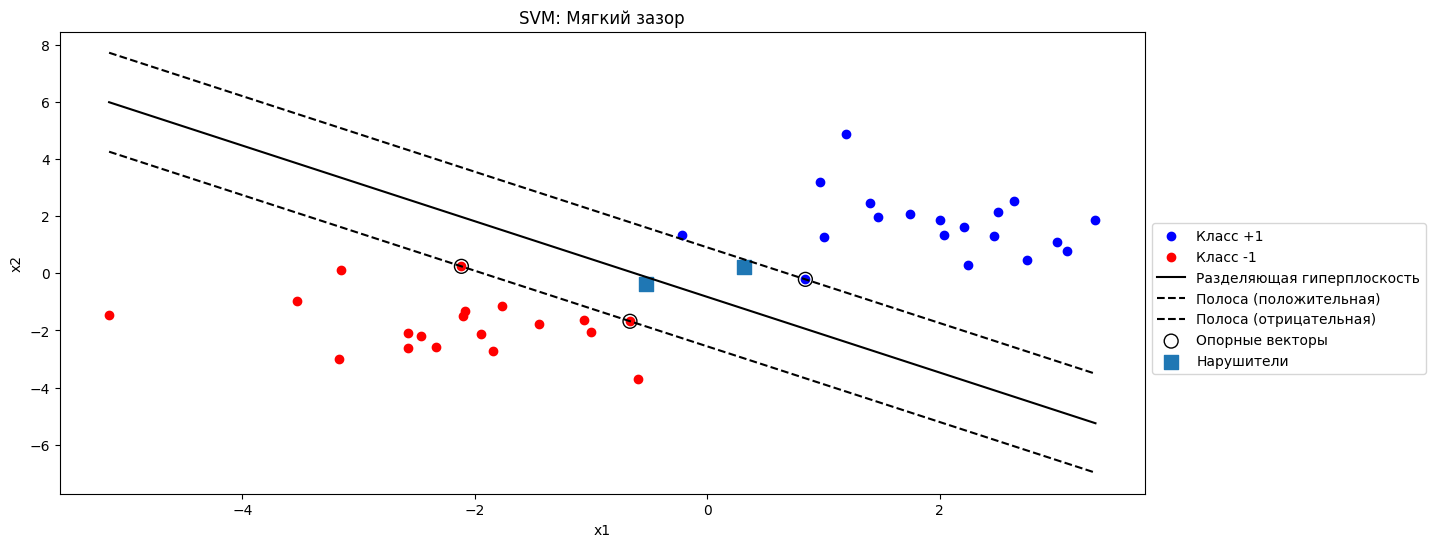

In [ ]:
plt.figure(figsize=(14,6))

# Построение данных
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Класс +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Класс -1')

# Разделяющая гиперплоскость: w1 * x1 + w2 * x2 + b = 0 => x2 = -(w1 * x1 + b) / w2
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = -(w[0] * x1 + w0) / w[1]
plt.plot(x1, x2, 'k-', label='Разделяющая гиперплоскость')

# Полосы: x2 = -(w1 * x1 + w0 - 1) / w2 и x2 = -(w1 * x1 + w0 + 1) / w2
margin_pos = -(w[0] * x1 + w0 - 1) / w[1]
margin_neg = -(w[0] * x1 + w0 + 1) / w[1]
plt.plot(x1, margin_pos, 'k--', label='Полоса (положительная)')
plt.plot(x1, margin_neg, 'k--', label='Полоса (отрицательная)')

# Выделение опорных векторов
plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=100, facecolors='none', edgecolors='k', label='Опорные векторы')
plt.scatter(X[imposters, 0], X[imposters, 1], s=100, marker=',', label='Нарушители')
plt.title('SVM: Мягкий зазор')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(bbox_to_anchor=(1, 0.6), loc="upper left")
plt.show()

In [ ]:
model = SVC(kernel='linear', C=1/3)
model.fit(X, y)
model.support_

array([21, 23, 37, 12, 13], dtype=int32)

# Пример на реальных данных

In [ ]:
!gdown 1qLjK_NMVRsmDCd9SHJ7Qro7QNDGeuqTx

Downloading...
From: https://drive.google.com/uc?id=1qLjK_NMVRsmDCd9SHJ7Qro7QNDGeuqTx
To: /content/spam.csv
100% 504k/504k [00:00<00:00, 25.4MB/s]


In [ ]:
data = pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1").drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data = data.rename(columns={'v1': 'type', 'v2': 'message'})
data.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['type'], test_size=0.2)

In [ ]:
model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9856502242152466

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       968
        spam       0.99      0.90      0.94       147

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
confusion_matrix(y_test,y_pred)

array([[967,   1],
       [ 15, 132]])